In [143]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [144]:
penguins = sns.load_dataset('penguins')
flights = sns.load_dataset('flights')
titanic = sns.load_dataset('titanic')
car_crashes = sns.load_dataset('car_crashes')
fmri = sns.load_dataset('fmri')
diamonds = sns.load_dataset('diamonds')

In [145]:
sns.color_palette()


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [146]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [147]:
#print(penguins)

tt = penguins['bill_length_mm'] >=50
print(tt)
t = penguins.loc[penguins['bill_length_mm'] >=50]

# print(t)

0      False
1      False
2      False
3      False
4      False
       ...  
339    False
340    False
341     True
342    False
343    False
Name: bill_length_mm, Length: 344, dtype: bool


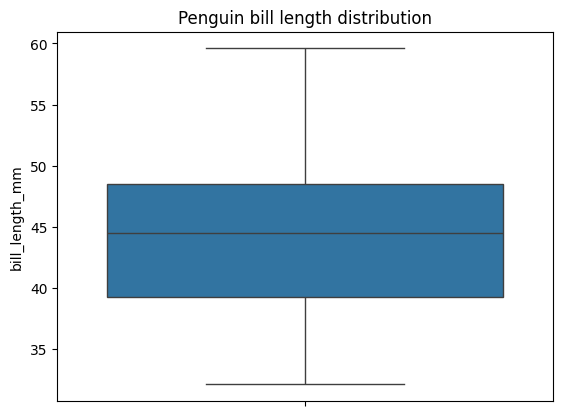

In [148]:
# Creating a box plot
sns.boxplot(penguins, y='bill_length_mm')
plt.title('Penguin bill length distribution')
plt.show()


   month   1949   1950
0    Jan  112.0  115.0
1    Feb  118.0  126.0
2    Mar  132.0  141.0
3    Apr  129.0  135.0
4    May  121.0  125.0
5    Jun  135.0  149.0
6    Jul  148.0  170.0
7    Aug  148.0  170.0
8    Sep  136.0  158.0
9    Oct  119.0  133.0
10   Nov  104.0  114.0
11   Dec  118.0  140.0


C:\Users\HuyenDT\AppData\Local\Temp\ipykernel_5092\2347669737.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  flights_grouped = flights.groupby(['year', 'month']).mean().reset_index()


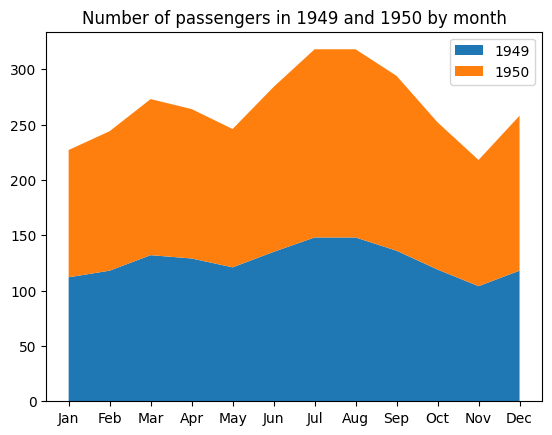

In [149]:
flights_grouped = flights.groupby(['year', 'month']).mean().reset_index()
#print(flights_grouped)
month_list = flights_grouped.loc[:11, 'month'].tolist()
list_1949 =  flights_grouped.loc[:11, 'passengers'].tolist()
list_1950 = flights_grouped.loc[12:23, 'passengers'].tolist()
zip_temp = zip(month_list, list_1949, list_1950)
#print(list(zip_temp))
flights_49_50 = pd.DataFrame(list(zip_temp), columns=['month', '1949', '1950'])

print(flights_49_50)

# Creating a stacked area chart
plt.stackplot(flights_49_50['month'], flights_49_50['1949'], flights_49_50['1950'], labels=['1949', '1950'])
plt.title('Number of passengers in 1949 and 1950 by month')
plt.legend()
plt.show()



In [150]:
titanic.drop(["sibsp","parch","fare","embarked", "class","who","adult_male","deck","embark_town","alive","alone"], axis=1, inplace=True)

In [151]:
print(type(titanic['survived'].value_counts()))

<class 'pandas.core.series.Series'>


In [152]:
titanic

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0


Text(0.5, 1.0, 'def')

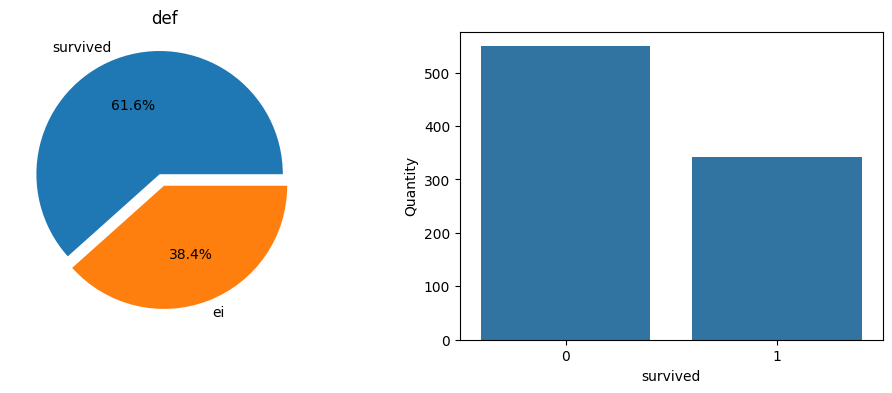

In [153]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

titanic['survived'].value_counts().plot.pie(explode=(0.1, 0), autopct='%1.1f%%', ax=ax[0], shadow=False, labels = ['survived', 'ei'])
sns.countplot(x='survived', data=titanic, ax=ax[1])
ax[0].set_ylabel('')
ax[0].set_title('abc')
ax[1].set_ylabel('Quantity')
ax[0].set_title('def')



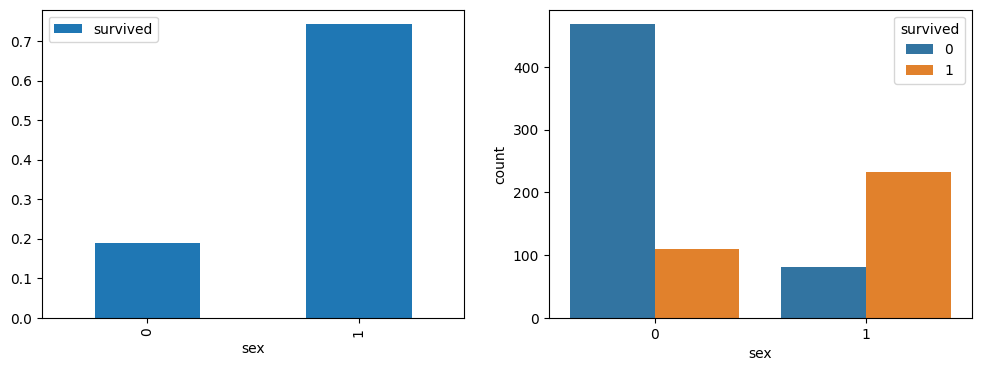

In [213]:
fig, ax2 = plt.subplots(1,2,figsize=(12,4))

titanic[['sex','survived']].groupby('sex').mean().plot.bar(ax=ax2[0])
sns.countplot(x='sex', data=titanic, hue='survived')
plt.show()

In [155]:
titanic['age'] = titanic['age'].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager','Student', 'Young Adult', 'Adult', 'Senior']
titanic['ageGrp'] = pd.cut(titanic['age'], bins=bins, labels=labels)

In [156]:
titanic['ageGrp'].value_counts()

ageGrp
Young Adult    220
Adult          195
Unknown        177
Student        138
Teenager        70
Baby            44
Child           25
Senior          22
Name: count, dtype: int64

In [157]:

titanic['sex'] = titanic['sex'].map({"male": 0, "female": 1})

In [158]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3,
               'Student': 4, 'Young Adult': 5, 'Adult': 6, 
               'Senior': 7}
titanic['ageGrp'] = titanic['ageGrp'].map(age_mapping)

In [159]:
titanic = titanic.drop('age', axis=1)

In [162]:
titanic['ageGrp'] = titanic['ageGrp'].fillna(5)

In [163]:
titanic

,survived,pclass,sex,ageGrp
0,0,3,0,4.0
1,1,1,1,6.0
2,1,3,1,5.0
3,1,1,1,5.0
4,0,3,0,5.0
...,...,...,...,...
886,0,2,0,5.0
887,1,1,1,4.0
888,0,3,1,5.0
889,1,1,0,5.0


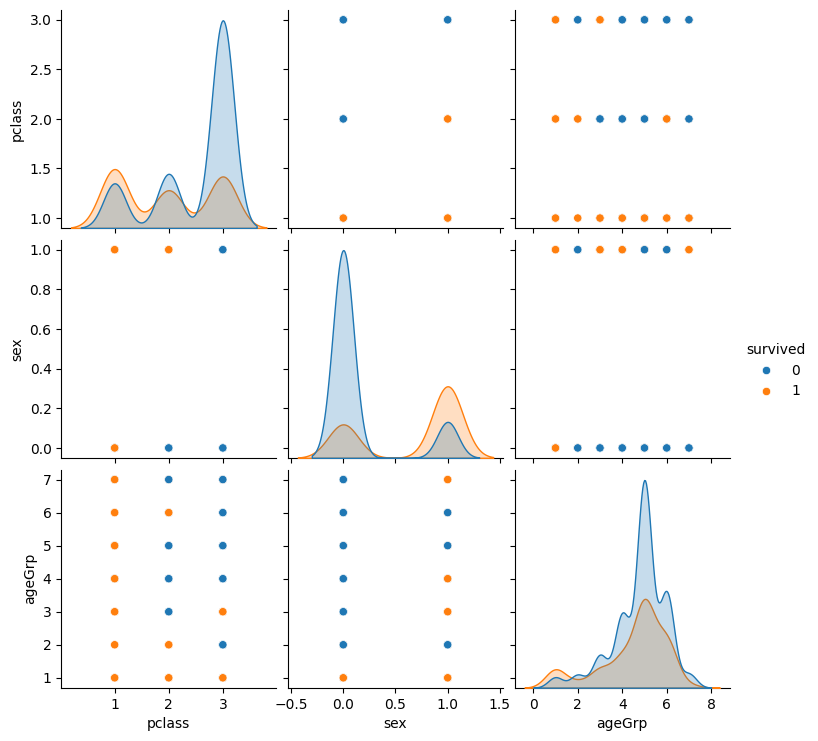

In [183]:
sns.pairplot(titanic, hue='survived')
plt.show()

<Axes: >

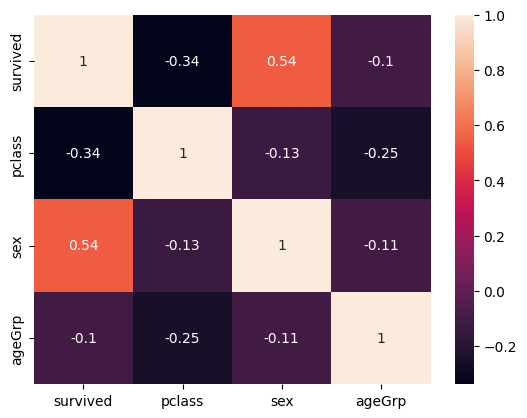

In [ ]:
sns.heatmap(titanic.corr(), annot=True)

In [210]:
from sklearn import tree 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split

In [167]:
X = titanic.drop('survived', axis=1)
y_true = titanic['survived']

In [180]:
classifier = tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(X=X, y=y_true)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [190]:
print(tree.export_text(classifier, feature_names=['pclass','sex','ageGrp'], class_names=['survived','ei']))

|--- sex <= 0.50
|   |--- ageGrp <= 2.50
|   |   |--- pclass <= 2.50
|   |   |   |--- class: ei
|   |   |--- pclass >  2.50
|   |   |   |--- class: survived
|   |--- ageGrp >  2.50
|   |   |--- pclass <= 1.50
|   |   |   |--- class: survived
|   |   |--- pclass >  1.50
|   |   |   |--- class: survived
|--- sex >  0.50
|   |--- pclass <= 2.50
|   |   |--- pclass <= 1.50
|   |   |   |--- class: ei
|   |   |--- pclass >  1.50
|   |   |   |--- class: ei
|   |--- pclass >  2.50
|   |   |--- ageGrp <= 5.50
|   |   |   |--- class: ei
|   |   |--- ageGrp >  5.50
|   |   |   |--- class: survived



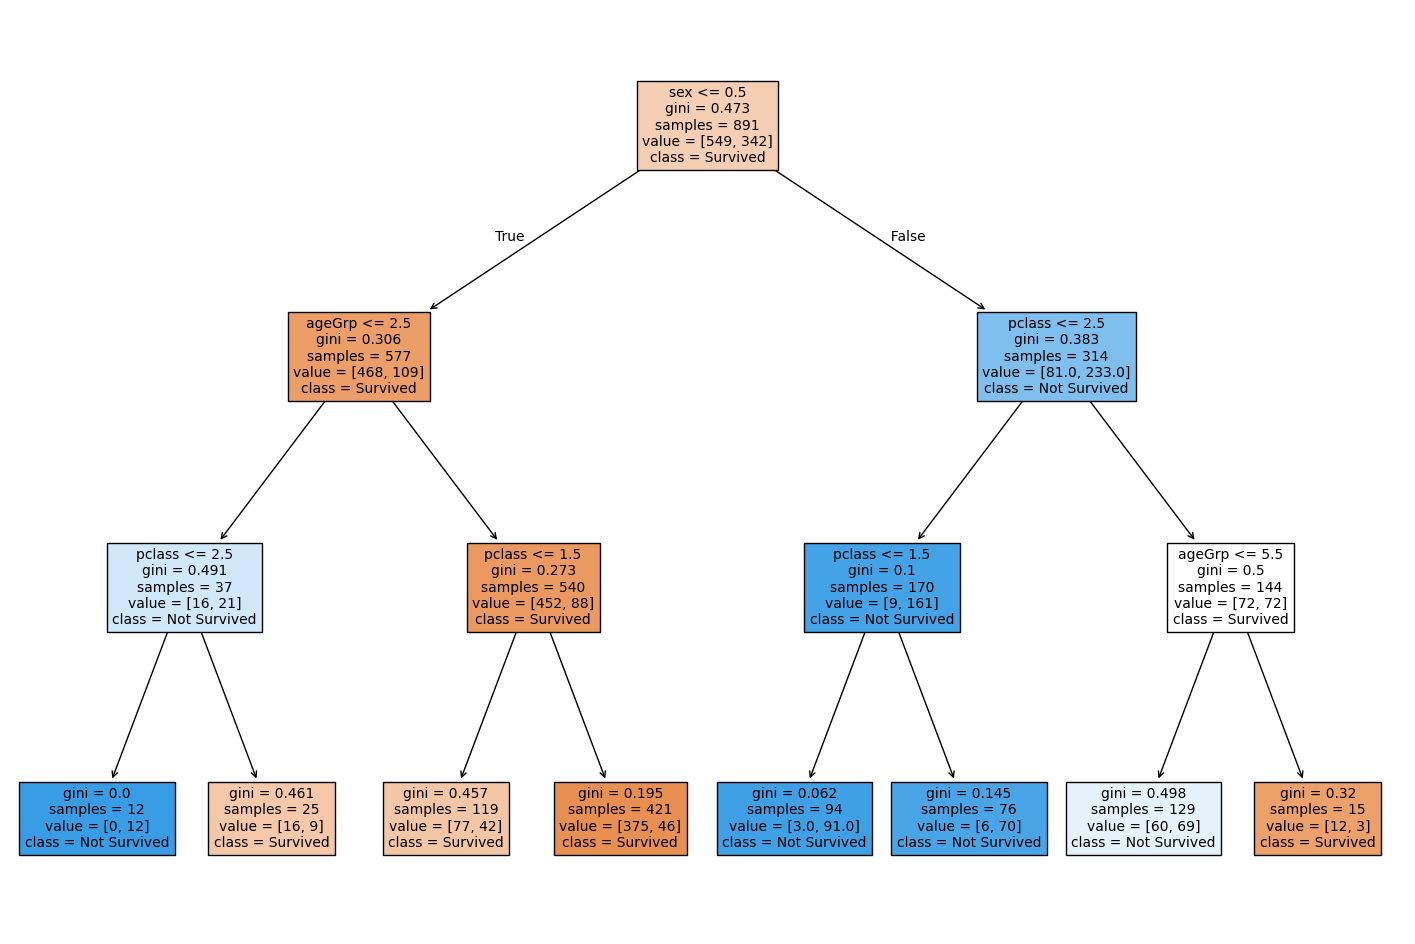

In [204]:
plt.figure(figsize=(18,12))
tree.plot_tree(classifier, filled=True, feature_names=['pclass','sex','ageGrp'], class_names=['Survived', 'Not Survived'], fontsize=10)
plt.show()

In [191]:
y_pred = classifier.predict(X)
accuracy = accuracy_score(y_true=y_true, y_pred=y_pred)
accuracy


0.8103254769921436

In [211]:
precision= precision_score(y_true=y_true, y_pred=y_pred)
recall = recall_score(y_true=y_true, y_pred=y_pred)
f1 = f1_score(y_true=y_true, y_pred=y_pred)
c_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)

In [209]:
print(accuracy, precision, recall, f1)

0.8103254769921436 0.7781350482315113 0.7076023391812866 0.7411944869831547


In [212]:
c_matrix

array([[480,  69],
       [100, 242]])

In [205]:
classifier.score(X,y_true)

0.8103254769921436

In [194]:
scores = cross_val_score(estimator=classifier, X=X, y=y_true, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())


[0.75418994 0.79213483 0.80337079 0.76966292 0.79775281]
0.783422258489737


In [197]:
titanic

,survived,pclass,sex,ageGrp
0,0,3,0,4.0
1,1,1,1,6.0
2,1,3,1,5.0
3,1,1,1,5.0
4,0,3,0,5.0
...,...,...,...,...
886,0,2,0,5.0
887,1,1,1,4.0
888,0,3,1,5.0
889,1,1,0,5.0


In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=.2, random_state=42)